<a id='Reading data'></a>

# TEAM RESEARCH A143A
## GooglePlayStoreApps Dataset Analysis



Context : Our research question is " Is there a difference in mean rating of apps between free and paid apps? ". Here the dependant variable is Rating, which is an interval variable and Type(free and paid) is an Independant varible which is of a nominal variable. Our hypothesis is as follows; 
    
    - Null hypothesis (H0): There is no difference in the mean rating of apps between free and paid apps.
    - Alternative hypothesis (H1 There is a difference in the mean rating of apps between free and paid apps.



## Reading data <a href='#Top' style="text-decoration: none;">^</a><br>

In this section, raw data will be read, overviewed and checked if cleaning is required.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind, norm

In [2]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [3]:
GooglePlayStoreAppsData = pd.read_csv('GooglePlayStoreApps.csv')

print('There are {} rows and {} columns in our dataset'.format(GooglePlayStoreAppsData.shape[0],GooglePlayStoreAppsData.shape[1]))

There are 10840 rows and 14 columns in our dataset


In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
GooglePlayStoreAppsData.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,CURRENT_VERSION,ANDROID_VERSION
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
GooglePlayStoreAppsData.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,CURRENT_VERSION,ANDROID_VERSION
10835,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10837,10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10838,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10839,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
GooglePlayStoreAppsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10840 non-null  int64  
 1   App              10840 non-null  object 
 2   Category         10840 non-null  object 
 3   Rating           10840 non-null  float64
 4   Reviews          10840 non-null  int64  
 5   Size_in_MB       10840 non-null  float64
 6   Installs         10840 non-null  int64  
 7   Type             10840 non-null  object 
 8   Price            10840 non-null  float64
 9   Content Rating   10840 non-null  object 
 10  Genres           10840 non-null  object 
 11  Last Updated     10840 non-null  object 
 12  CURRENT_VERSION  10840 non-null  object 
 13  ANDROID_VERSION  10840 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.2+ MB


In this dataset, we have 10841 rows & 14 columns. In that we have 8 categorical columns and 5 numerical columns.

###### Categorical Columns: 
App, Category, Type, Content Rating, Genres, Last Updated, CURRENT_VERSION, ANDROID_VERSION.

###### Numerical Columns: 
(Index column is not included. Have to make sure the column should be renamed to slno or to kept as unnamed:0 itself)

Continuous: Rating, Size_in_MB, Price.

Discrete: Reviews, Installs.

From these, we have chosen the columns Rating(Which is a dependent variable) and Type(Which is an independent variable).

In [8]:
GooglePlayStoreAppsData.describe()

,Unnamed: 0,Rating,Reviews,Size_in_MB,Installs,Price
count,10840.000000,10840.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,5419.533948,4.206476,4.441529e+05,20.186036,1.546434e+07,1.027368
std,3129.439605,0.480342,2.927761e+06,20.976050,8.502936e+07,15.949703
min,0.000000,1.000000,0.000000e+00,0.011000,0.000000e+00,0.000000
25%,2709.750000,4.100000,3.800000e+01,5.900000,1.000000e+03,0.000000
50%,5419.500000,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,8129.250000,4.500000,5.477550e+04,26.000000,5.000000e+06,0.000000
max,10840.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [9]:
total = GooglePlayStoreAppsData.isnull().sum().sort_values(ascending=False)
percent = (GooglePlayStoreAppsData.isnull().sum()/GooglePlayStoreAppsData.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Unnamed: 0,0,0.0
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size_in_MB,0,0.0


There are no missing data. This simplifies the analysis but it is a very unlikely scenario in a real-life where analysts spend a significant amount of time cleaning their data before the core analysis is performed

<a id='Analysis & Visualization'></a>

## Analysis & Visualization <a href='#Top' style="text-decoration: none;">^</a><br>

In this section, the dataset will be analysed and visually depicted.

#### First lets Visualize certain columns and also compare them.

In [10]:
fig = plt.figure(figsize = (15,15))
pos = GooglePlayStoreAppsData.groupby(by='Category').size().reset_index()
pos.columns = ['Category','Count']

labels = pos['Category']
values = pos['Count']
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label', textinfo='percent', textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Distribution of Apps based on Category")
fig.show()

<Figure size 1500x1500 with 0 Axes>

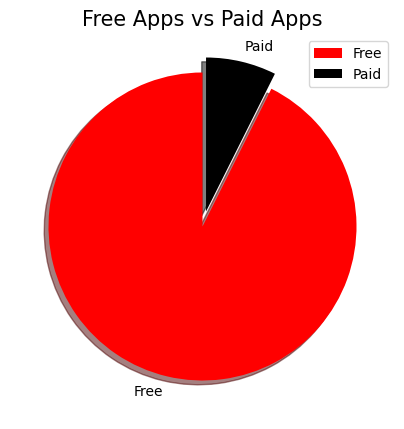

In [11]:
fig = plt.figure(figsize = (5,5))
labels = ['Free', 'Paid'] 
size = GooglePlayStoreAppsData['Type'].value_counts()
#colors = plt.cm.Wistia(np.linspace(0, 1, 5))
colors = ['r','k','y']
explode = [0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Free Apps vs Paid Apps', fontsize = 15)
plt.legend()
plt.show()

#### Applications with Maximum No: of reviews

In [12]:
MaxReviews = GooglePlayStoreAppsData.sort_values(by = 'Reviews',ascending = False).head(10)

<Axes: xlabel='App', ylabel='Reviews'>

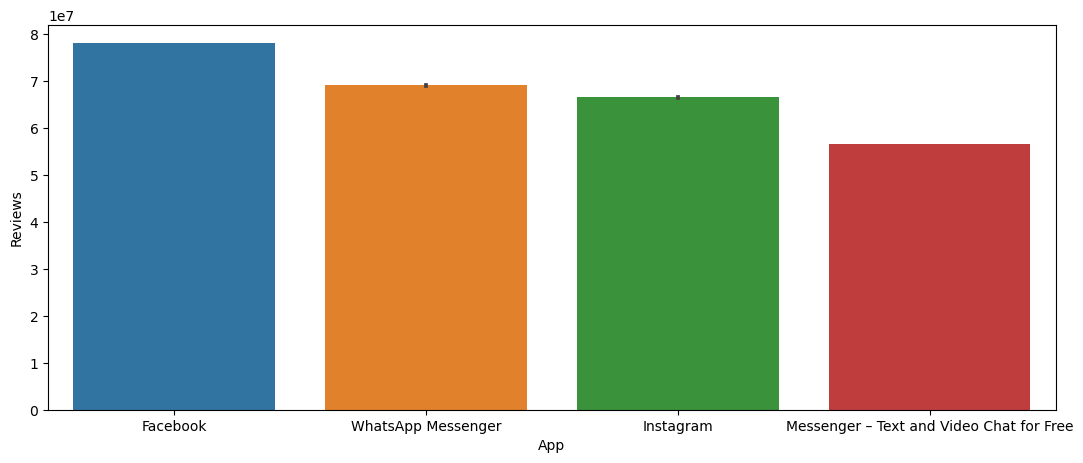

In [13]:
fig = plt.figure(figsize = (13,5))
sns.barplot(x='App',y='Reviews' , data = MaxReviews)

#### Rating vs Reviews

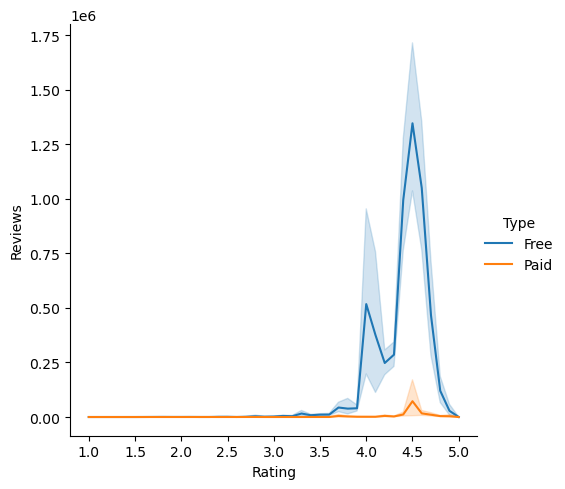

In [14]:
sns.relplot(x="Rating", y="Reviews", hue = 'Type' , kind = 'line' , data=GooglePlayStoreAppsData)

#### Rating vs Installs

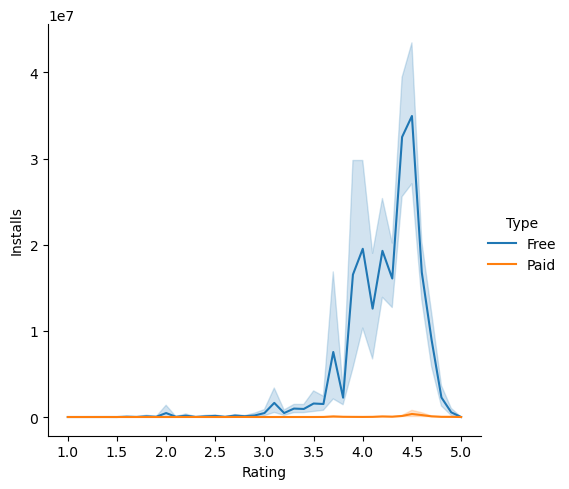

In [15]:
sns.relplot(x="Rating", y="Installs", hue = 'Type' , kind = 'line' , data=GooglePlayStoreAppsData)

Type
Free    10040
Paid      800
Name: count, dtype: int64
Cleaned data shape: (10840, 14)


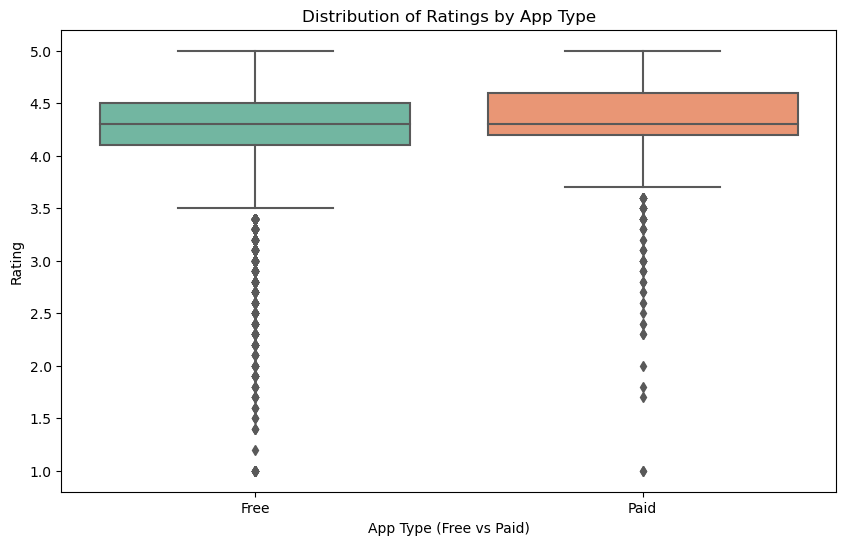

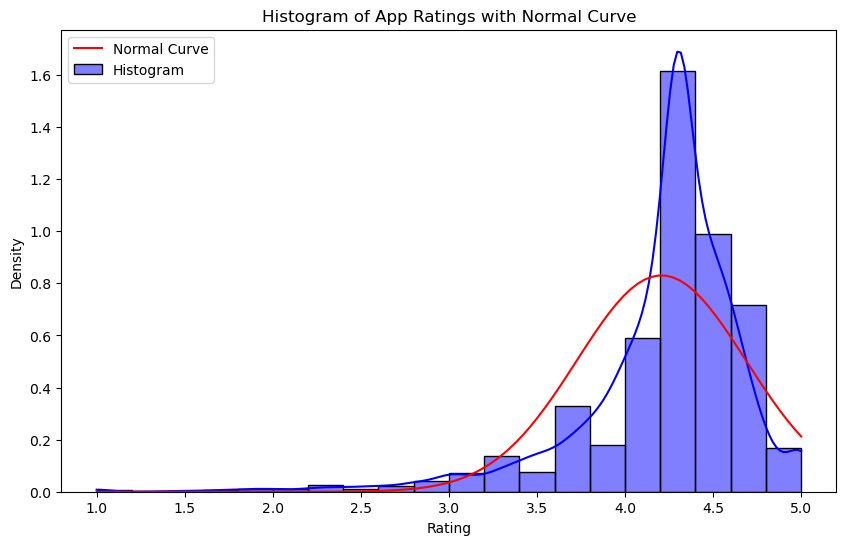

In [16]:
print(GooglePlayStoreAppsData["Type"].value_counts())

# Step 3: Data Cleaning
# Keep only rows with non-null values for 'Rating' and 'Type'
data = GooglePlayStoreAppsData[(GooglePlayStoreAppsData['Rating'].notnull()) & (GooglePlayStoreAppsData['Type'].notnull())]

# Convert 'Type' to categorical (Free or Paid)
data = GooglePlayStoreAppsData[GooglePlayStoreAppsData['Type'].isin(['Free', 'Paid'])]

# Verify dataset shape after cleaning
print("Cleaned data shape:", GooglePlayStoreAppsData.shape)

# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.boxplot(data=GooglePlayStoreAppsData, x='Type', y='Rating', palette='Set2')
plt.title('Distribution of Ratings by App Type')
plt.xlabel('App Type (Free vs Paid)')
plt.ylabel('Rating')
plt.show()

# Histogram with Normal Curve Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], kde=True, stat="density", color='blue', bins=20, label='Histogram')

# Overlay a normal distribution curve
mean_rating = data['Rating'].mean()
std_rating = data['Rating'].std()
x = np.linspace(data['Rating'].min(), data['Rating'].max(), 100)
plt.plot(x, norm.pdf(x, mean_rating, std_rating), color='red', label='Normal Curve')

plt.title('Histogram of App Ratings with Normal Curve')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()


The histogram displays the distribution of app ratings in the dataset.
The blue bars represent the frequency of different rating values, normalized to density.
The red curve overlays a theoretical normal distribution based on the dataset's mean and standard deviation.
Interpreting the Graph:

Shape:
If the histogram closely matches the normal curve, the ratings approximate a normal distribution.
A skewed histogram (e.g., left or right) indicates that the data is not normally distributed.
Direction:
If the curve peaks to the left, the ratings are skewed negatively (toward lower ratings).
If it peaks to the right, the ratings are skewed positively (toward higher ratings).
Hypothesis Context:

The histogram helps visualize the overall distribution of ratings, giving insight into potential variability within free and paid app groups.
Understanding the shape aids in interpreting how ratings are distributed, which could influence the results of hypothesis testing.





In [17]:
# Step 5: Descriptive Statistics
rating_means = GooglePlayStoreAppsData.groupby('Type')['Rating'].mean()
print("\n Mean Ratings by App Type:")
print("\n",rating_means)

# Step 6: Hypothesis Testing
# Null Hypothesis: The mean rating of free apps is equal to the mean rating of paid apps.
# Alternative Hypothesis: The mean rating of free apps is not equal to the mean rating of paid apps.

free_ratings = data[GooglePlayStoreAppsData['Type'] == 'Free']['Rating']
paid_ratings = data[GooglePlayStoreAppsData['Type'] == 'Paid']['Rating']

# Perform independent t-test
t_stat, p_value = ttest_ind(free_ratings, paid_ratings, equal_var=False)

print("\n T-Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 7: Conclusion
alpha = 0.05
if p_value < alpha:
    print("\n We reject the null hypothesis. There is a statistically significant difference in mean ratings between free and paid apps.")
else:
    print("\n We fail to reject the null hypothesis. There is no statistically significant difference in mean ratings between free and paid apps.")



 Mean Ratings by App Type:

 Type
Free    4.201175
Paid    4.273000
Name: Rating, dtype: float64

 T-Test Results:
T-statistic: -3.9778
P-value: 0.0001

 We reject the null hypothesis. There is a statistically significant difference in mean ratings between free and paid apps.
